# Module imports

In [77]:
import seaborn as sn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Loading data and checking contents

In [78]:
tennis = pd.read_csv("tennis_stats.csv")
sn.set_theme()

In [79]:
tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [80]:
tennis.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [81]:
tennis.describe(include='all')

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
unique,438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ivan Dodig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,NaN,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,NaN,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,NaN,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,NaN,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,NaN,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000


# Exploratory analysis here:

We considering first a pair plot of a subselection of columns which intuitively correlate with: `Wins`, `Losses` and/or `Winnings`.

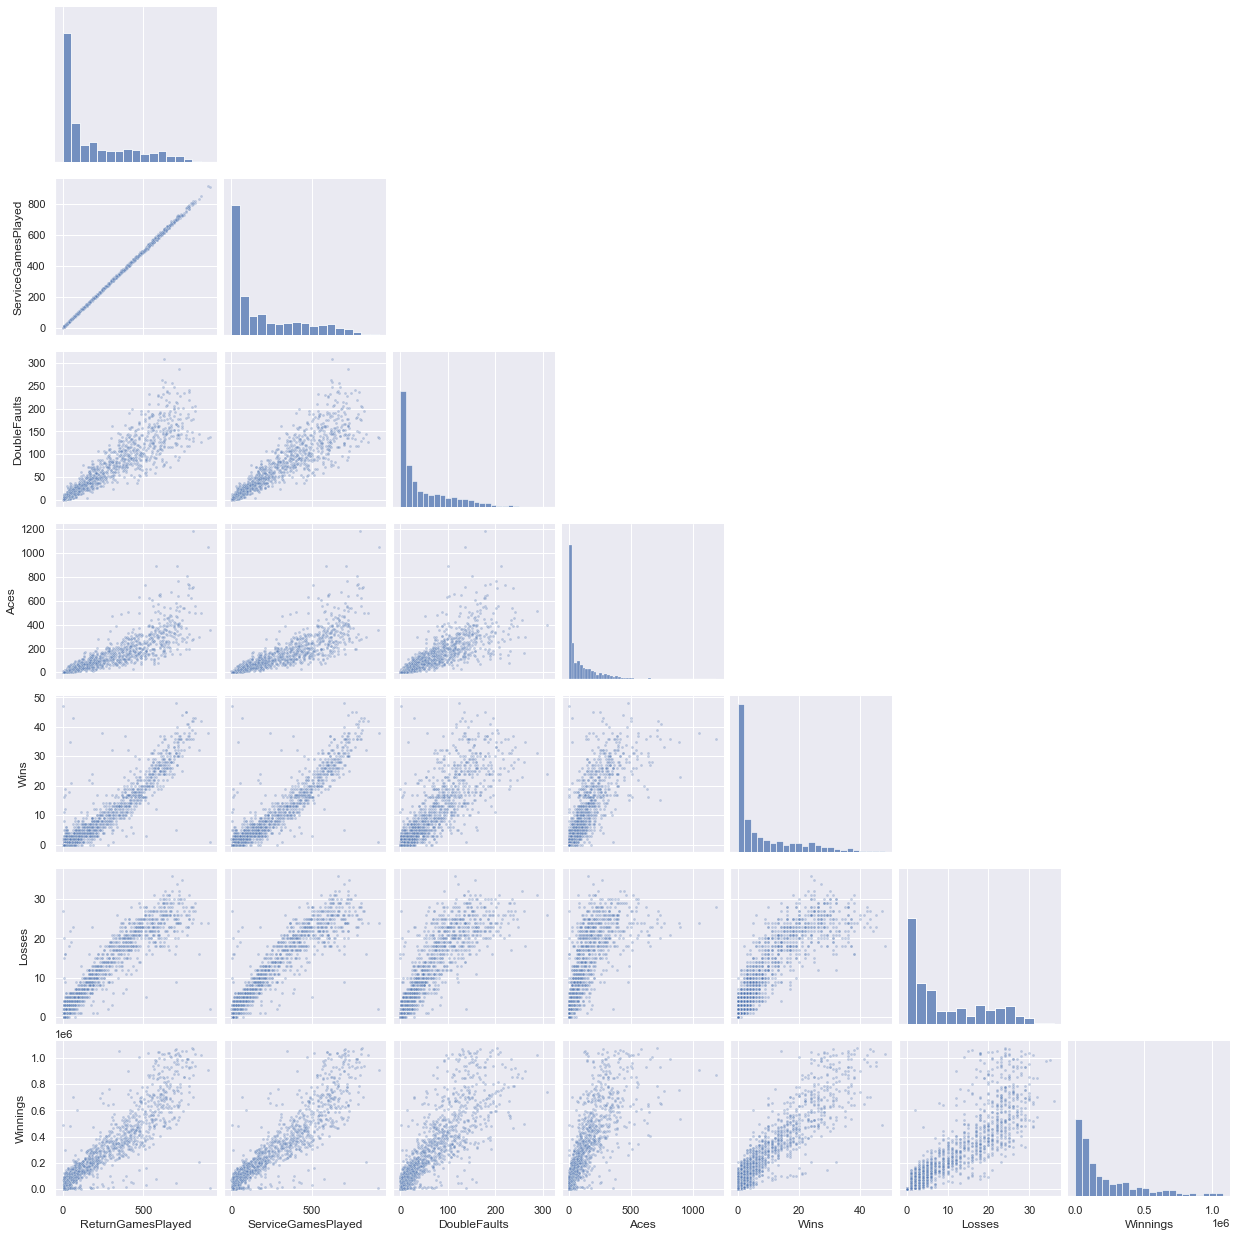

In [82]:
tennis_reduced = tennis[['ReturnGamesPlayed','ServiceGamesPlayed','DoubleFaults','Aces','Wins','Losses','Winnings']]
sn.pairplot(data=tennis_reduced,plot_kws=dict(marker=".",alpha=0.3),corner=True)

To improve on the above and make sure we consider all combinations we can compute all correlation pairs between numerical columns and plot a heatmap. The darker the color the stronger the correlation. 

<Axes: >

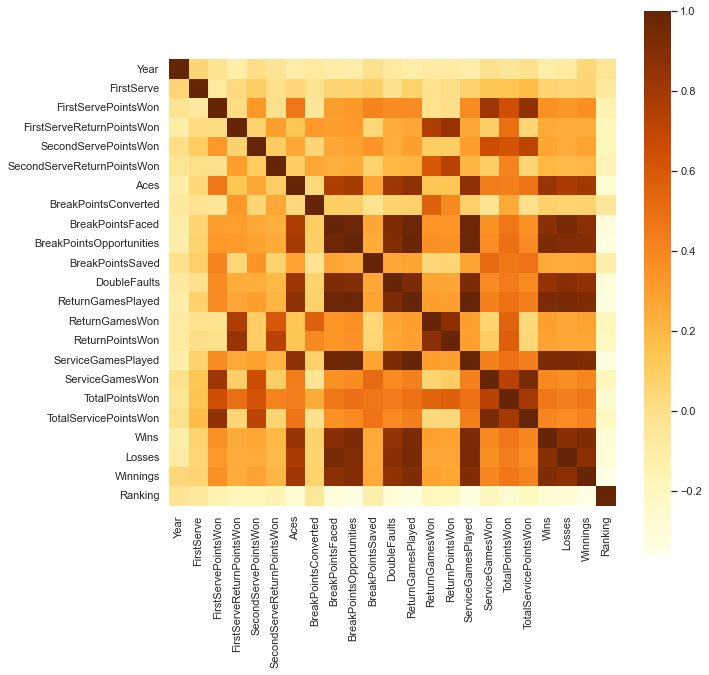

In [83]:
corr = tennis.select_dtypes('number').corr()
plt.figure(figsize=(10,10))
sn.heatmap(data=corr,cmap="YlOrBr",square=True)

# Single feature linear regressions here:


0.8545653480336243


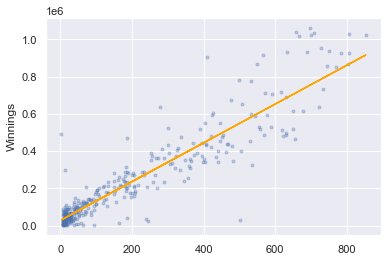

In [84]:
X = np.array(tennis[['ServiceGamesPlayed']]).reshape(-1,1)
y = np.array(tennis[['Winnings']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
ols = LinearRegression()
ols.fit(X_train,y_train)
y_pred = ols.predict(X_test)
plt.scatter(X_test,y_test,marker='.',alpha=0.3)
plt.plot(X_test,y_pred,color='orange')
plt.ylabel('Winnings')
print(ols.score(X_test,y_test))

0.852634619000583


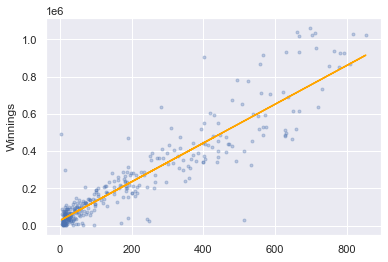

In [85]:
X = np.array(tennis[['ReturnGamesPlayed']]).reshape(-1,1)
y = np.array(tennis[['Winnings']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
ols = LinearRegression()
ols.fit(X_train,y_train)
y_pred = ols.predict(X_test)
plt.scatter(X_test,y_test,marker='.',alpha=0.3)
plt.plot(X_test,y_pred,color='orange')
plt.ylabel('Winnings')
print(ols.score(X_test,y_test))

0.6902879317155014


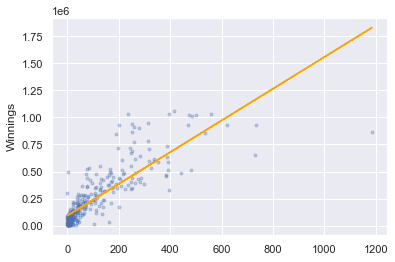

In [86]:
X = np.array(tennis[['Aces']]).reshape(-1,1)
y = np.array(tennis[['Winnings']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
ols = LinearRegression()
ols.fit(X_train,y_train)
y_pred = ols.predict(X_test)
plt.scatter(X_test,y_test,marker='.',alpha=0.3)
plt.plot(X_test,y_pred,color='orange')
plt.ylabel('Winnings')
print(ols.score(X_test,y_test))

0.7330255207524714


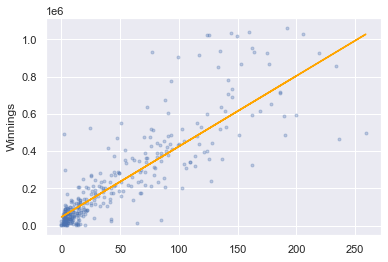

In [87]:
X = np.array(tennis[['DoubleFaults']]).reshape(-1,1)
y = np.array(tennis[['Winnings']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
ols = LinearRegression()
ols.fit(X_train,y_train)
y_pred = ols.predict(X_test)
plt.scatter(X_test,y_test,marker='.',alpha=0.3)
plt.plot(X_test,y_pred,color='orange')
plt.ylabel('Winnings')
print(ols.score(X_test,y_test))

0.8640634524237093


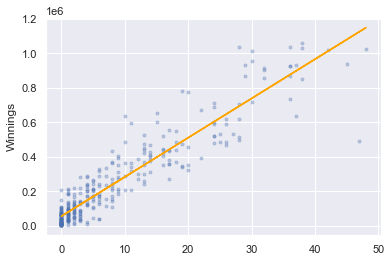

In [88]:
X = np.array(tennis[['Wins']]).reshape(-1,1)
y = np.array(tennis[['Winnings']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
ols = LinearRegression()
ols.fit(X_train,y_train)
y_pred = ols.predict(X_test)
plt.scatter(X_test,y_test,marker='.',alpha=0.3)
plt.plot(X_test,y_pred,color='orange')
plt.ylabel('Winnings')
print(ols.score(X_test,y_test))

# Two-feature linear regressions here:

In [89]:
X = np.array(tennis[['ReturnGamesPlayed','Aces']]).reshape(-1,2)
y = np.array(tennis[['Winnings']])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

ols = LinearRegression()
ols.fit(X_train,y_train)
print(ols.coef_)
print(ols.intercept_)

y_pred = ols.predict(X_test)
print(ols.score(X_test,y_test))
# plt.scatter(X_test,y_test,marker='.',alpha=0.4)
# plt.plot(X_test,y_pred,color='orange')


[[1019.61255501   37.4624182 ]]
[28150.47039799]
0.8538014087384413


In [90]:
X = np.array(tennis[['ServiceGamesPlayed','Wins']]).reshape(-1,2)
y = np.array(tennis[['Winnings']])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

ols = LinearRegression()
ols.fit(X_train,y_train)
print(ols.coef_)
print(ols.intercept_)

y_pred = ols.predict(X_test)
print(ols.score(X_test,y_test))

[[  545.66852571 11633.23902787]]
[34740.38551643]
0.8939471939083918


In [91]:
X = np.array(tennis[['ReturnGamesPlayed','Wins']]).reshape(-1,2)
y = np.array(tennis[['Winnings']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

ols = LinearRegression()
ols.fit(X_train,y_train)
print(ols.coef_)
print(ols.intercept_)

y_pred = ols.predict(X_test)
print(ols.score(X_test,y_test))

[[  543.9329633  11674.73563729]]
[34392.95623529]
0.8932701433011171


# Multi-feature regression

In [92]:
X = np.array(tennis[['ServiceGamesWon','ReturnGamesPlayed','Aces','BreakPointsOpportunities']]).reshape(-1,4)
y = np.array(tennis[['Winnings']])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

ols = LinearRegression()
ols.fit(X_train,y_train)
print(ols.coef_)
print(ols.intercept_)

y_pred = ols.predict(X_test)
print(ols.score(X_test,y_test))

[[54174.36524646   544.33565642   171.88342396   720.36455461]]
[-3747.72632441]
0.8583761400198529
